In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

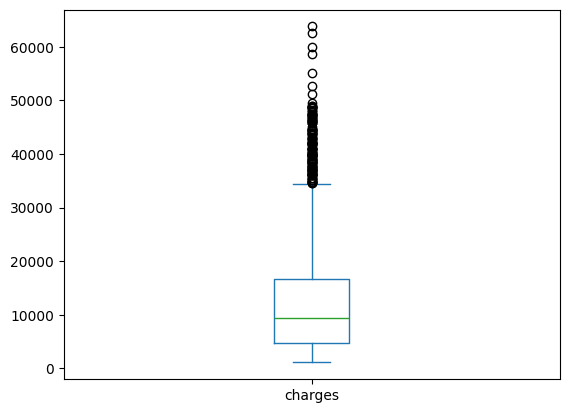

In [59]:
df['charges'].plot(kind='box')

In [60]:
df2=df[df['charges']<=50000].reset_index(drop=True)
df2


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1326,50,male,30.970,3,no,northwest,10600.54830
1327,18,female,31.920,0,no,northeast,2205.98080
1328,18,female,36.850,0,no,southeast,1629.83350
1329,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

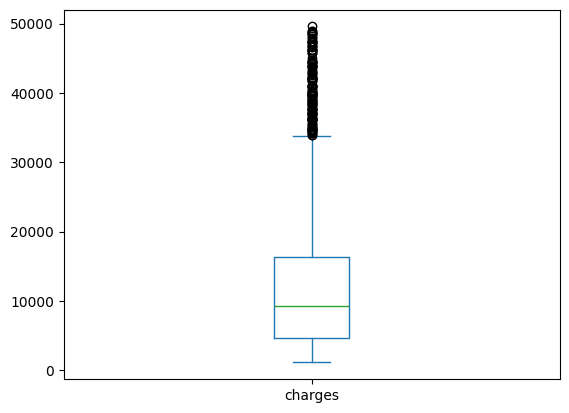

In [61]:
df2['charges'].plot(kind='box')

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.9+ KB


In [63]:
df2.describe()

,age,bmi,children,charges
count,1331.000000,1331.000000,1331.00000,1331.000000
mean,39.185575,30.633017,1.09692,13036.775677
std,14.058021,6.088782,1.20603,11699.360324
min,18.000000,15.960000,0.00000,1121.873900
25%,26.000000,26.220000,0.00000,4719.630300
50%,39.000000,30.305000,1.00000,9301.893550
75%,51.000000,34.600000,2.00000,16359.170275
max,64.000000,53.130000,5.00000,49577.662400


In [64]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1326,50,male,30.970,3,no,northwest,10600.54830
1327,18,female,31.920,0,no,northeast,2205.98080
1328,18,female,36.850,0,no,southeast,1629.83350
1329,21,female,25.800,0,no,southwest,2007.94500


In [65]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(sparse_output=False)
# columns=['sex']
# ohe.fit(df2[columns])
# ohe.transform(df2[columns])
# ohe_df=pd.DataFrame(ohe.transform(df2[columns]),columns=ohe.get_feature_names_out())

# df3=df2.join(ohe_df)

# df3


In [66]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
sex_le=LabelEncoder()
sex_le.fit(df2['sex'])
df2['sex']=sex_le.transform(df2['sex'])

region_le=LabelEncoder()
region_le.fit(df2['region'])
df2['region']=region_le.transform(df2['region'])
# smoker_le=LabelEncoder()
# smoker_le.fit(df2['smoker'])


df2['smoker']=df2['smoker'].map({'yes':1,'no':0})


In [67]:
# df2['smoker'].unique()


# df2['region'].unique()


In [68]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1326,50,1,30.970,3,0,1,10600.54830
1327,18,0,31.920,0,0,0,2205.98080
1328,18,0,36.850,0,0,2,1629.83350
1329,21,0,25.800,0,0,3,2007.94500


<Axes: >

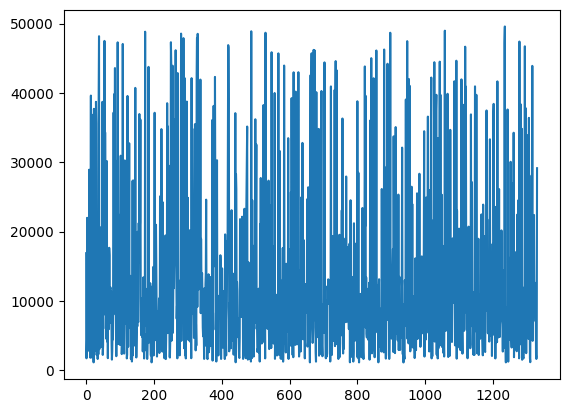

In [69]:
df2['charges'].plot(kind='line')

In [70]:
#scale age 0-4
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
df2[['age']]=mms.fit_transform(df2[['age']])


df2

,age,sex,bmi,children,smoker,region,charges
0,-1.436416,0,27.900,0,1,3,16884.92400
1,-1.507576,1,33.770,1,0,2,1725.55230
2,-0.795971,1,33.000,3,0,2,4449.46200
3,-0.440169,1,22.705,0,0,1,21984.47061
4,-0.511329,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1326,0.769560,1,30.970,3,0,1,10600.54830
1327,-1.507576,0,31.920,0,0,0,2205.98080
1328,-1.507576,0,36.850,0,0,2,1629.83350
1329,-1.294095,0,25.800,0,0,3,2007.94500


In [71]:
bmi_scaler=StandardScaler()
df2['bmi']=bmi_scaler.fit_transform(df2[['bmi']])

df2

,age,sex,bmi,children,smoker,region,charges
0,-1.436416,0,-0.449030,0,1,3,16884.92400
1,-1.507576,1,0.515401,1,0,2,1725.55230
2,-0.795971,1,0.388891,3,0,2,4449.46200
3,-0.440169,1,-1.302559,0,0,1,21984.47061
4,-0.511329,1,-0.288017,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1326,0.769560,1,0.055366,3,0,1,10600.54830
1327,-1.507576,0,0.211449,0,0,0,2205.98080
1328,-1.507576,0,1.021439,0,0,2,1629.83350
1329,-1.294095,0,-0.794056,0,0,3,2007.94500


In [72]:
#dimensionality reduction - PCA
Y=df2['charges']
X=df2.drop('charges',axis=1)

X


,age,sex,bmi,children,smoker,region
0,-1.436416,0,-0.449030,0,1,3
1,-1.507576,1,0.515401,1,0,2
2,-0.795971,1,0.388891,3,0,2
3,-0.440169,1,-1.302559,0,0,1
4,-0.511329,1,-0.288017,0,0,1
...,...,...,...,...,...,...
1326,0.769560,1,0.055366,3,0,1
1327,-1.507576,0,0.211449,0,0,0
1328,-1.507576,0,1.021439,0,0,2
1329,-1.294095,0,-0.794056,0,0,3


In [73]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X_pca=pca.fit_transform(X)
X_pca

array([[-1.03054816],
       [-0.13120366],
       [ 1.87063335],
       ...,
       [-1.02888022],
       [-1.06203605],
       [-0.97663675]], shape=(1331, 1))

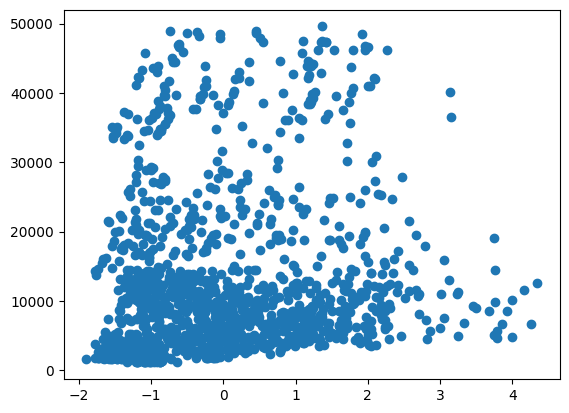

In [74]:
#plot the data
plt.scatter(X_pca,Y)

In [75]:
df2

,age,sex,bmi,children,smoker,region,charges
0,-1.436416,0,-0.449030,0,1,3,16884.92400
1,-1.507576,1,0.515401,1,0,2,1725.55230
2,-0.795971,1,0.388891,3,0,2,4449.46200
3,-0.440169,1,-1.302559,0,0,1,21984.47061
4,-0.511329,1,-0.288017,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1326,0.769560,1,0.055366,3,0,1,10600.54830
1327,-1.507576,0,0.211449,0,0,0,2205.98080
1328,-1.507576,0,1.021439,0,0,2,1629.83350
1329,-1.294095,0,-0.794056,0,0,3,2007.94500


In [76]:
#split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


X_train

,age,sex,bmi,children,smoker,region
584,-0.369008,0,-0.069501,1,1,1
963,0.342597,1,-0.865526,1,0,1
1304,-0.440169,0,-0.647009,0,0,1
170,0.698399,1,-0.054714,0,0,3
847,1.552326,1,0.273882,2,0,1
...,...,...,...,...,...,...
1095,-1.009453,0,0.551546,1,0,2
1130,-0.795971,1,0.523616,0,0,1
1294,1.623486,1,0.039757,3,1,1
860,0.840720,1,-0.859775,0,0,3


In [77]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()
lr.fit(X_train,Y_train)
# lr.score(X_test,Y_test)

Y_pred=lr.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)

print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)




MSE: 35590520.23051401
MAE: 4216.124709523131
R2: 0.7758304739465027


In [78]:
df2.describe()

,age,sex,bmi,children,smoker,region,charges
count,1.331000e+03,1331.000000,1.331000e+03,1331.00000,1331.000000,1331.000000,1331.000000
mean,-1.788368e-16,0.504884,8.541460e-17,1.09692,0.200601,1.514651,13036.775677
std,1.000376e+00,0.500164,1.000376e+00,1.20603,0.400601,1.105170,11699.360324
min,-1.507576e+00,0.000000,-2.410750e+00,0.00000,0.000000,0.000000,1121.873900
25%,-9.382922e-01,0.000000,-7.250507e-01,0.00000,0.000000,1.000000,4719.630300
50%,-1.320559e-02,1.000000,-5.389252e-02,1.00000,0.000000,2.000000,9301.893550
75%,8.407205e-01,1.000000,6.517682e-01,2.00000,0.000000,2.000000,16359.170275
max,1.765807e+00,1.000000,3.696214e+00,5.00000,1.000000,3.000000,49577.662400


In [79]:
#ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,Y_train)
Y_ridge_pred=ridge.predict(X_test)
mse_ridge=mean_squared_error(Y_test,Y_ridge_pred)
mae_ridge=mean_absolute_error(Y_test,Y_ridge_pred)
r2_ridge=r2_score(Y_test,Y_ridge_pred)

print('Ridge Regression')
print('MSE:',mse_ridge)
print('MAE:',mae_ridge)
print('R2:',r2_ridge)


Ridge Regression
MSE: 35664073.20386657
MAE: 4228.139830260353
R2: 0.7753671950995099


In [80]:
#lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
Y_lasso_pred=lasso.predict(X_test)
mse_lasso=mean_squared_error(Y_test,Y_lasso_pred)
mae_lasso=mean_absolute_error(Y_test,Y_lasso_pred)
r2_lasso=r2_score(Y_test,Y_lasso_pred)

print('Lasso Regression')
print('MSE:',mse_lasso)
print('MAE:',mae_lasso)
print('R2:',r2_lasso)


Lasso Regression
MSE: 35590989.98352961
MAE: 4216.15871635876
R2: 0.7758275151723633


In [85]:
#tune linear regression
param_grid={'alpha':[0.01,0.05,0.1,0.25,0.5,1,10,100]}
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
grid_search=GridSearchCV(ridge,param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,Y_train)
print('Best parameters:',grid_search.best_params_)
best_ridge=grid_search.best_estimator_
Y_best_ridge_pred=best_ridge.predict(X_test)
mse_best_ridge=mean_squared_error(Y_test,Y_best_ridge_pred)
mae_best_ridge=mean_absolute_error(Y_test,Y_best_ridge_pred)
r2_best_ridge=r2_score(Y_test,Y_best_ridge_pred)

print('Tuned Ridge Regression')
print('MSE:',mse_best_ridge)
print('MAE:',mae_best_ridge)
print('R2:',r2_best_ridge)


Best parameters: {'alpha': 0.01}
Tuned Ridge Regression
MSE: 35591223.98954782
MAE: 4216.238661208225
R2: 0.7758260412681366


In [91]:
#linear regression tune
param_grid={'fit_intercept':[True,False]}

from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
grid_search=GridSearchCV(lr,param_grid,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,Y_train)
print('Best parameters:',grid_search.best_params_)
best_lr=grid_search.best_estimator_
Y_best_lr_pred=best_lr.predict(X_test)
mse_best_lr=mean_squared_error(Y_test,Y_best_lr_pred)
mae_best_lr=mean_absolute_error(Y_test,Y_best_lr_pred)
r2_best_lr=r2_score(Y_test,Y_best_lr_pred)

print('Tuned Linear Regression')
print('MSE:',mse_best_lr)
print('MAE:',mae_best_lr)
print('R2:',r2_best_lr)


Best parameters: {'fit_intercept': True}
Tuned Linear Regression
MSE: 35590520.23051401
MAE: 4216.124709523131
R2: 0.7758304739465027


In [92]:
df2

,age,sex,bmi,children,smoker,region,charges
0,-1.436416,0,-0.449030,0,1,3,16884.92400
1,-1.507576,1,0.515401,1,0,2,1725.55230
2,-0.795971,1,0.388891,3,0,2,4449.46200
3,-0.440169,1,-1.302559,0,0,1,21984.47061
4,-0.511329,1,-0.288017,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1326,0.769560,1,0.055366,3,0,1,10600.54830
1327,-1.507576,0,0.211449,0,0,0,2205.98080
1328,-1.507576,0,1.021439,0,0,2,1629.83350
1329,-1.294095,0,-0.794056,0,0,3,2007.94500


In [93]:
#prediction a person 50 years old, male, 2 children, 0,2
transformed_age=mms.transform([[50]])
transformed_bmi=bmi_scaler.transform([[30]])
new_data=[[transformed_age[0][0],1,transformed_bmi[0][0],2,0,1]]
new_data
best_lr.predict(new_data)

/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11748.91061539])